<a href="https://colab.research.google.com/github/DrumDong/Donggyu/blob/master/%ED%95%B8%EC%A6%88%EC%98%A8%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/7%EC%9E%A5_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 연습문제 8

Using TensorFlow backend.


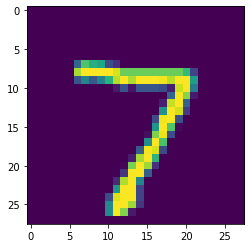

7


In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.imshow(X_test[0].reshape(28,28))
plt.show()
print(y_test[0])

In [2]:
X_train, X_val,y_train,y_val = train_test_split(X_train,y_train, test_size=0.166655, random_state=123)
X_train=X_train.reshape(50000,784)
X_val=X_val.reshape(10000,784)
X_test=X_test.reshape(10000,784)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 784)
(50000,)
(10000, 784)
(10000,)
(10000, 784)
(10000,)


랜덤 포레스트드 분류기, 엑스트라 트리 분류기, SVM의 여러 종류 분류기 훈련. 그리고 검증세트에서 직접 투표 분류기를 사용하는 앙상블로 연결

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

# 랜덤 포레스트
rnd_clf = RandomForestClassifier(n_estimators=10,n_jobs=-1)
rnd_clf.fit(X_train,y_train)
print('랜덤포래스트 score:',rnd_clf.score(X_val,y_val))

#엑스트라 트리
et_clf= ExtraTreesClassifier(n_estimators=10,n_jobs=-1)
et_clf.fit(X_train,y_train)
print('엑스트라 트리 score:',et_clf.score(X_val,y_val))

#로지스틱 회귀
lr_clf = LogisticRegression(C=1e5)
lr_clf.fit(X_train,y_train)
print('로지스틱 회귀 score:',lr_clf.score(X_val,y_val))

#svm 모델은 시간도 오래걸림 이 문제에서 성능을 저하시키는 원인으로 나오고 있음

랜덤포래스트 score: 0.9454
엑스트라 트리 score: 0.952
로지스틱 회귀 score: 0.917


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [4]:
#투표방식 적용해보기
from sklearn.ensemble import VotingClassifier
rnd_clf = RandomForestClassifier(n_estimators=10,n_jobs=-1)
et_clf= ExtraTreesClassifier(n_estimators=10,n_jobs=-1)
lr_clf = LogisticRegression(C=1e5)

voting_clf = VotingClassifier(
    estimators=[('rf',rnd_clf),('et',et_clf),('lr',lr_clf)],
    voting='hard' #직접투표 'soft' 간접투표
)

voting_clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

In [8]:
voting_clf.estimators

[('rf',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                         oob_score=False, random_state=None, verbose=0,
                         warm_start=False)),
 ('et', ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n

In [7]:
[estimator.score(X_val, y_val) for estimator in voting_clf.estimators_]

[0.9468, 0.9475, 0.917]

In [5]:
#from sklearn.metrics import accuracy_score
print('투표방식 score:',voting_clf.score(X_val,y_val))

투표방식 score: 0.9536


In [9]:
# 투표방식안에 있는 estimators
voting_clf.estimators

[('rf',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                         oob_score=False, random_state=None, verbose=0,
                         warm_start=False)),
 ('et', ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n

In [10]:
# 훈련된 투표방식안에 있는 estimators
voting_clf.estimators_

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                        oob_score=False, random_state=None, verbose=0,
                        warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                   